In [1]:
import pandas as pd

In [6]:
clusters = pd.read_csv('clusters.csv').set_index('message_id')

In [12]:
embeddings = pd.read_csv('embeddings.csv').set_index('message_id')

In [15]:
data = clusters.join(embeddings).dropna()

In [17]:
data.cluster.unique()

array([0, 2, 3, 1, 4], dtype=int64)

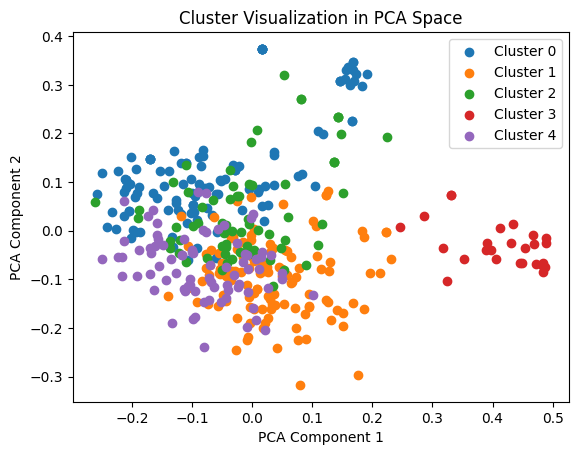

In [62]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

df = data.copy()

# Convert 'embedding' from strings to lists of floats
df['embedding'] = df['embedding'].apply(ast.literal_eval)

# Create a matrix from the embedding vectors
embedding_matrix = np.array(df['embedding'].tolist())

# Perform PCA to transform the data into a lower-dimensional space, e.g., 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedding_matrix)

# Add the transformed data to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Create a visualization of clusters in the PCA space
for cluster_id, group in df.groupby('cluster'):
    plt.scatter(group['pca1'], group['pca2'], label=f'Cluster {cluster_id}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.title('Cluster Visualization in PCA Space')
plt.show()
